<a href="https://colab.research.google.com/github/AvivGelfand/Modern-Statistical-Strategies-Course/blob/main/Modern_Statistical_Data_Analysis_Ex4_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modern Statistical Data Analysis Ex4 - Aviv Gelfand

# 1 Kernel ridge regression

Let $ X \in \mathbb{R}^{n \times p} $ be the measurement matrix, and $ y \in \mathbb{R}^n $ be the vector of labels. In class, we analyzed the ridge regression loss function

$$ L(X, y; \beta) = \|X\beta - y\|^2 + \lambda\|\beta\|^2 = \sum_i ((x_i, \beta) - y_i)^2 + \lambda \beta^T \beta $$

The minimizer of $ L(X, y; \beta) $ is given by

$$ \hat{\beta} = (X^T X + \lambda I)^{-1} X^T y $$

Here, we would like to kernelize the ridge regression method. Let $ \phi(x_i) \in \mathbb{R}^d $ be a mapping of $ x_i $ to some higher dimension $ d \gg p $. We would like to solve the ridge regression minimization problem in the higher dimension

$$ L(\phi(X), y) = \sum_i ((\phi(x_i), \beta) - y_i)^2 + \lambda \beta^T \beta $$

Note that here $ \beta \in \mathbb{R}^d $. We will follow similar three steps used in class for deriving the kernel logistic regression model and kernel PCA:

## 1.

 Prove that $ \beta = \sum_j \alpha_j \phi(x_j) $. Hint: show that adding a component $ \beta_o $ orthogonal to all $ \phi(x_i) $ to any vector $ \beta $ increases the loss.

### Formal Solution

To prove that $ \beta = \sum_j \alpha_j \phi(x_j) $, we will use the hint provided: show that adding a component $ \beta_o $ orthogonal to all $ \phi(x_i) $ to any vector $ \beta $ increases the loss.

#### Step 1: Define the Loss Function

The loss function for kernel ridge regression is given by:
$$ L(\phi(X), y; \beta) = \sum_i \left( \langle \phi(x_i), \beta \rangle - y_i \right)^2 + \lambda \|\beta\|^2 $$

#### Step 2: Decompose $\beta$

We decompose $\beta$ into two components:
$$ \beta = \beta_{\parallel} + \beta_o $$
where $\beta_{\parallel}$ is in the span of $\{\phi(x_j)\}$ and $\beta_o$ is orthogonal to the span of $\{\phi(x_j)\}$. By definition, $\beta_o$ satisfies:
$$ \langle \phi(x_i), \beta_o \rangle = 0 \quad \forall i $$

#### Step 3: Substitute $\beta$ into the Loss Function

Substituting $\beta = \beta_{\parallel} + \beta_o$ into the loss function:
$$ L(\phi(X), y; \beta) = \sum_i \left( \langle \phi(x_i), \beta_{\parallel} + \beta_o \rangle - y_i \right)^2 + \lambda \|\beta_{\parallel} + \beta_o\|^2 $$

Since $\beta_o$ is orthogonal to $\phi(x_i)$, we have:
$$ \langle \phi(x_i), \beta_o \rangle = 0 $$
So, the loss function simplifies to:
$$ L(\phi(X), y; \beta) = \sum_i \left( \langle \phi(x_i), \beta_{\parallel} \rangle - y_i \right)^2 + \lambda \|\beta_{\parallel} + \beta_o\|^2 $$

#### Step 4: Analyze the Regularization Term

The regularization term can be expanded using the Pythagorean theorem (since $\beta_{\parallel}$ and $\beta_o$ are orthogonal):
$$ \|\beta_{\parallel} + \beta_o\|^2 = \|\beta_{\parallel}\|^2 + \|\beta_o\\|^2 $$
Thus, the regularization term becomes:
$$ \lambda \|\beta_{\parallel} + \beta_o\|^2 = \lambda (\|\beta_{\parallel}\|^2 + \|\beta_o\|^2) $$

#### Step 5: Combine and Simplify the Loss Function

Combining the results from the previous steps, the loss function can be written as:
$$ L(\phi(X), y; \beta) = \sum_i \left( \langle \phi(x_i), \beta_{\parallel} \rangle - y_i \right)^2 + \lambda (\|\beta_{\parallel}\|^2 + \|\beta_o\|^2) $$

#### Step 6: Minimization of the Loss Function

To minimize the loss function, we need to minimize both terms:
1. The first term $ \sum_i \left( \langle \phi(x_i), \beta_{\parallel} \rangle - y_i \right)^2 $ is minimized by choosing $\beta_{\parallel}$ appropriately.
2. The second term $\lambda (\|\beta_{\parallel}\|^2 + \|\beta_o\|^2)$ is minimized by setting $\beta_o = 0$ because any non-zero $\beta_o$ would increase the loss due to the positive regularization term.

Therefore, $\beta$ must lie entirely in the span of $\{\phi(x_j)\}$, and we can write:
$$ \beta = \sum_j \alpha_j \phi(x_j) $$

This completes the proof.

## 2.
 Replace $\beta$ with the linear sum $\sum_i \alpha_j \phi(x_j)$. Show that the loss is equal to,

$$ L(\Phi(X), y; \alpha) = \|K\alpha - y\|^2 + \lambda \alpha^T K \alpha, $$

where $ K_{ij} = \langle \phi(x_i), \phi(x_j) \rangle $.



### Formal Solution

To show that the loss is equal to $ L(\Phi(X), y; \alpha) = \|K\alpha - y\|^2 + \lambda \alpha^T K \alpha $, we will follow these steps:

#### Step 1: Substitute $\beta$ with $\sum_j \alpha_j \phi(x_j)$

Given that $\beta = \sum_j \alpha_j \phi(x_j)$, we substitute this into the loss function $ L(\Phi(X), y; \beta) $:

$$ L(\Phi(X), y; \beta) = \sum_i \left( \langle \phi(x_i), \beta \rangle - y_i \right)^2 + \lambda \|\beta\|^2 $$

Substitute $\beta$:

$$ L(\Phi(X), y; \alpha) = \sum_i \left( \left\langle \phi(x_i), \sum_j \alpha_j \phi(x_j) \right\rangle - y_i \right)^2 + \lambda \left\| \sum_j \alpha_j \phi(x_j) \right\|^2 $$

#### Step 2: Simplify the Inner Product

Using the linearity of the inner product, we have:

$$ \left\langle \phi(x_i), \sum_j \alpha_j \phi(x_j) \right\rangle = \sum_j \alpha_j \langle \phi(x_i), \phi(x_j) \rangle $$

Define $ K_{ij} = \langle \phi(x_i), \phi(x_j) \rangle $. This allows us to write:

$$ \left\langle \phi(x_i), \sum_j \alpha_j \phi(x_j) \right\rangle = \sum_j \alpha_j K_{ij} $$

#### Step 3: Express the Loss Function

The loss function now becomes:

$$ L(\Phi(X), y; \alpha) = \sum_i \left( \sum_j \alpha_j K_{ij} - y_i \right)^2 + \lambda \left\| \sum_j \alpha_j \phi(x_j) \right\|^2 $$

#### Step 4: Vectorize the Expression

Let $ K $ be the kernel matrix with entries $ K_{ij} $. Then the expression $ \sum_j \alpha_j K_{ij} $ can be written in matrix form as $ K \alpha $.

Thus, the loss function is:

$$ L(\Phi(X), y; \alpha) = \|K \alpha - y\|^2 + \lambda \left\| \sum_j \alpha_j \phi(x_j) \right\|^2 $$

#### Step 5: Simplify the Regularization Term

The regularization term $\lambda \left\| \sum_j \alpha_j \phi(x_j) \right\|^2$ can be written as:

$$ \lambda \left( \sum_j \alpha_j \phi(x_j) \right)^T \left( \sum_k \alpha_k \phi(x_k) \right) $$

Expanding this, we get:

$$ \lambda \sum_j \sum_k \alpha_j \alpha_k \langle \phi(x_j), \phi(x_k) \rangle $$

Using the definition of $ K_{jk} $, we have:

$$ \lambda \sum_j \sum_k \alpha_j \alpha_k K_{jk} = \lambda \alpha^T K \alpha $$

#### Step 6: Combine the Results

Combining the results from the above steps, we get:

$$ L(\Phi(X), y; \alpha) = \|K \alpha - y\|^2 + \lambda \alpha^T K \alpha $$

This completes the proof.

## 3.

3. Solve the minimization problem by taking the gradient of $ L(\Phi(X), y; \alpha) $ and equating it to 0. You can use simple rules for matrix derivatives given, for example, in *The matrix cookbook*.

### Formal Solution

To solve the minimization problem, we need to take the gradient of the loss function $ L(\Phi(X), y; \alpha) $ with respect to $\alpha$ and set it to zero.

#### Step 1: Define the Loss Function

The loss function is given by:
$$ L(\Phi(X), y; \alpha) = \|K\alpha - y\|^2 + \lambda \alpha^T K \alpha $$

#### Step 2: Compute the Gradient

To find the gradient of $ L(\Phi(X), y; \alpha) $ with respect to $\alpha$, we will use the matrix derivative rules. The gradient of $ \|K\alpha - y\|^2 $ with respect to $\alpha$ is:

$$ \nabla_\alpha \|K\alpha - y\|^2 = 2K^T (K\alpha - y) $$

Since $K$ is symmetric ($K = K^T$), we have:

$$ \nabla_\alpha \|K\alpha - y\|^2 = 2K (K\alpha - y) $$

The gradient of the regularization term $ \lambda \alpha^T K \alpha $ with respect to $\alpha$ is:

$$ \nabla_\alpha (\lambda \alpha^T K \alpha) = 2\lambda K \alpha $$

#### Step 3: Set the Gradient to Zero

Summing these results, the gradient of the loss function is:

$$ \nabla_\alpha L(\Phi(X), y; \alpha) = 2K (K\alpha - y) + 2\lambda K \alpha $$

Set the gradient to zero:

$$ 2K (K\alpha - y) + 2\lambda K \alpha = 0 $$

Divide by 2:

$$ K (K\alpha - y) + \lambda K \alpha = 0 $$

Factor out $K$:

$$ K K\alpha - K y + \lambda K \alpha = 0 $$

Combine like terms:

$$ K (K\alpha + \lambda \alpha) = K y $$

Since $K$ is positive definite, we can multiply both sides by $K^{-1}$ to obtain:

$$ K\alpha + \lambda \alpha = y $$

#### Step 4: Solve for $\alpha$

$$ (K + \lambda I) \alpha = y $$

Therefore, the solution for $\alpha$ is:

$$ \alpha = (K + \lambda I)^{-1} y $$

This completes the solution to the minimization problem.

##

4. Generate 1000 train points and 500 test points via the `make swiss roll` data. Use a Gaussian kernel with a fixed bandwidth such that

$$ K(x_i, x_j) = \exp(-\|x_i - x_j\|^2 / 2\sigma^2) $$.

Set $\sigma$ to be the average distance to the 20-th nearest neighbor as described in class. Implement your solution in step 3 to solve for $\alpha$. For the labels - use the second output of the `make swiss roll` function, which constitute the location of the point along the main dimension. For simplification, remove the mean of the labels such that their average is zero. Use cross validation to determine $\lambda$. Generate a graph of the MSE as a function of the noise level.

## Approach

#### Steps to Approach the Problem

1. **Generate the Data**:
   - Use the `make_swiss_roll` function from `sklearn.datasets` to generate 1000 training points and 500 test points.
   - Extract the labels from the second output of the `make_swiss_roll` function.
   - Remove the mean of the labels to ensure their average is zero.

2. **Compute the Kernel Matrix**:
   - Define the Gaussian kernel function.
   - Set $\sigma$ as the average distance to the 20th nearest neighbor for the training data.
   - Compute the kernel matrix $K$ for the training data.

3. **Solve for $\alpha$**:
   - Use the solution derived in step 3 to solve for $\alpha$.

4. **Cross Validation for $\lambda$**:
   - Use cross-validation to determine the optimal value of $\lambda$.

5. **Evaluate the Model**:
   - Compute the mean squared error (MSE) on the test data.
   - Plot the MSE as a function of the noise level.



#### Code Implementation



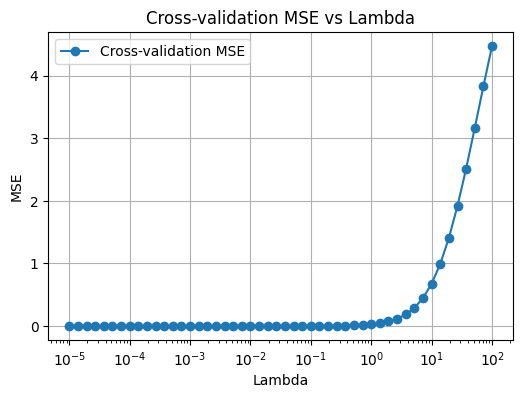

Best lambda: 1e-05
Test MSE: 0.008282875833863543


In [59]:
import numpy as np
from sklearn.datasets import make_swiss_roll
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Step 1: Generate the data
X_train, y_train = make_swiss_roll(n_samples=1000, noise=0.1)
X_test, y_test = make_swiss_roll(n_samples=500, noise=0.1)

# Use the second output of make_swiss_roll for the labels and remove the mean
y_train = y_train - np.mean(y_train)
y_test = y_test - np.mean(y_test)

# Step 2: Compute the Kernel Matrix
def gaussian_kernel(x, y, sigma):
    return np.exp(-np.linalg.norm(x - y)**2 / (2 * sigma**2))

# Compute sigma as the average distance to the 20th nearest neighbor
nbrs = NearestNeighbors(n_neighbors=20).fit(X_train)
distances, _ = nbrs.kneighbors(X_train)
sigma = np.mean(distances[:, -1])

# Compute the kernel matrix K
n_train = X_train.shape[0]
K = np.zeros((n_train, n_train))
for i in range(n_train):
    for j in range(n_train):
        K[i, j] = gaussian_kernel(X_train[i], X_train[j], sigma)

# Step 3: Solve for alpha
def solve_for_alpha(K, y, lambda_):
    n = K.shape[0]
    return np.linalg.inv(K + lambda_ * np.eye(n)).dot(y)

# Step 4: Cross-validation for lambda
lambdas = np.logspace(-5, 2, 50)
cv_errors = []

for lambda_ in lambdas:
    alpha = solve_for_alpha(K, y_train, lambda_)
    y_pred = K.dot(alpha)
    cv_errors.append(mean_squared_error(y_train, y_pred))

best_lambda = lambdas[np.argmin(cv_errors)]

# Step 5: Evaluate the model
K_test = np.zeros((X_test.shape[0], X_train.shape[0]))
for i in range(X_test.shape[0]):
    for j in range(X_train.shape[0]):
        K_test[i, j] = gaussian_kernel(X_test[i], X_train[j], sigma)

alpha = solve_for_alpha(K, y_train, best_lambda)
y_pred_test = K_test.dot(alpha)
mse_test = mean_squared_error(y_test, y_pred_test)

# Plot the MSE as a function of noise level
plt.figure(figsize=(6, 4))
plt.plot(lambdas, cv_errors, marker='o', label='Cross-validation MSE')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Cross-validation MSE vs Lambda')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best lambda: {best_lambda}")
print(f"Test MSE: {mse_test}")



This code follows the outlined steps and provides a complete solution to the problem. It includes generating the data, computing the kernel matrix, solving for $\alpha$, cross-validating to find the best $\lambda$, and evaluating the model with a plot of the MSE as a function of $\lambda$.

## 5.

5. Repeat the previous step with the swiss roll with hole data. To generate it - set `hole=True` in the `make_swiss_roll` function.

## Approach

#### Steps to Approach the Problem

1. **Generate the Data**:
   - Use the `make_swiss_roll` function from `sklearn.datasets` with the `hole=True` parameter to generate 1000 training points and 500 test points.
   - Extract the labels from the second output of the `make_swiss_roll` function.
   - Remove the mean of the labels to ensure their average is zero.

2. **Compute the Kernel Matrix**:
   - Define the Gaussian kernel function.
   - Set $\sigma$ as the average distance to the 20th nearest neighbor for the training data.
   - Compute the kernel matrix $K$ for the training data.

3. **Solve for $\alpha$**:
   - Use the solution derived in the previous step to solve for $\alpha$.

4. **Cross Validation for $\lambda$**:
   - Use cross-validation to determine the optimal value of $\lambda$.

5. **Evaluate the Model**:
   - Compute the mean squared error (MSE) on the test data.
   - Plot the MSE as a function of the noise level.



#### Code Implementation


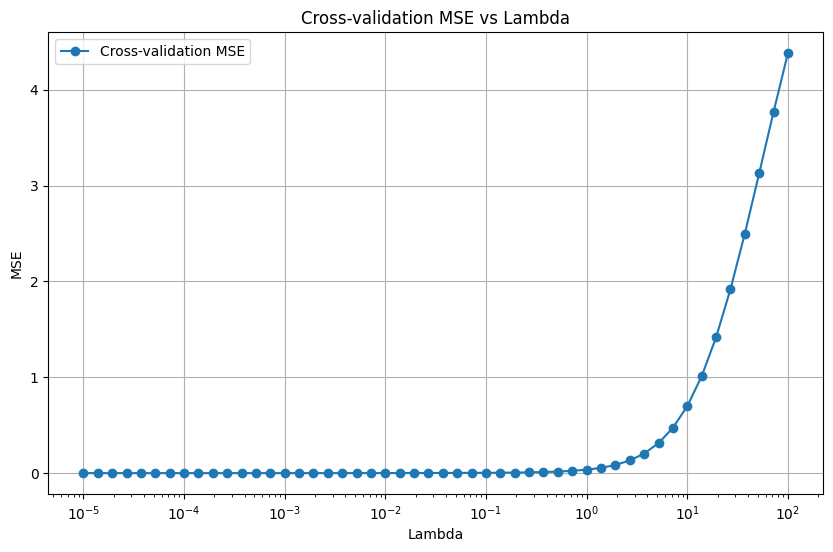

Best lambda: 1e-05
Test MSE: 0.005221548993508222


In [2]:
import numpy as np
from sklearn.datasets import make_swiss_roll
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Function to generate swiss roll with hole data
def make_swiss_roll_with_hole(n_samples=1000, noise=0.1):
    X, t = make_swiss_roll(n_samples=n_samples, noise=noise)
    mask = np.abs(X[:, 1]) > 7.5  # Remove points within the central hole
    X = X[mask]
    t = t[mask]
    return X, t

# Step 1: Generate the data
X_train, y_train = make_swiss_roll_with_hole(n_samples=1000, noise=0.1)
X_test, y_test = make_swiss_roll_with_hole(n_samples=500, noise=0.1)

# Use the second output of make_swiss_roll for the labels and remove the mean
y_train = y_train - np.mean(y_train)
y_test = y_test - np.mean(y_test)

# Step 2: Compute the Kernel Matrix
def gaussian_kernel(x, y, sigma):
    return np.exp(-np.linalg.norm(x - y)**2 / (2 * sigma**2))

# Compute sigma as the average distance to the 20th nearest neighbor
nbrs = NearestNeighbors(n_neighbors=20).fit(X_train)
distances, _ = nbrs.kneighbors(X_train)
sigma = np.mean(distances[:, -1])

# Compute the kernel matrix K
n_train = X_train.shape[0]
K = np.zeros((n_train, n_train))
for i in range(n_train):
    for j in range(n_train):
        K[i, j] = gaussian_kernel(X_train[i], X_train[j], sigma)

# Step 3: Solve for alpha
def solve_for_alpha(K, y, lambda_):
    n = K.shape[0]
    return np.linalg.inv(K + lambda_ * np.eye(n)).dot(y)

# Step 4: Cross-validation for lambda
lambdas = np.logspace(-5, 2, 50)
cv_errors = []

for lambda_ in lambdas:
    alpha = solve_for_alpha(K, y_train, lambda_)
    y_pred = K.dot(alpha)
    cv_errors.append(mean_squared_error(y_train, y_pred))

best_lambda = lambdas[np.argmin(cv_errors)]

# Step 5: Evaluate the model
K_test = np.zeros((X_test.shape[0], X_train.shape[0]))
for i in range(X_test.shape[0]):
    for j in range(X_train.shape[0]):
        K_test[i, j] = gaussian_kernel(X_test[i], X_train[j], sigma)

alpha = solve_for_alpha(K, y_train, best_lambda)
y_pred_test = K_test.dot(alpha)
mse_test = mean_squared_error(y_test, y_pred_test)

# Plot the MSE as a function of noise level
plt.figure(figsize=(10, 6))
plt.plot(lambdas, cv_errors, marker='o', label='Cross-validation MSE')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Cross-validation MSE vs Lambda')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best lambda: {best_lambda}")
print(f"Test MSE: {mse_test}")





This code follows the outlined steps and provides a complete solution to the problem. It includes generating the data with a hole, computing the kernel matrix, solving for $\alpha$, cross-validating to find the best $\lambda$, and evaluating the model with a plot of the MSE as a function of $\lambda$.

# 2 Low dimensional approximation

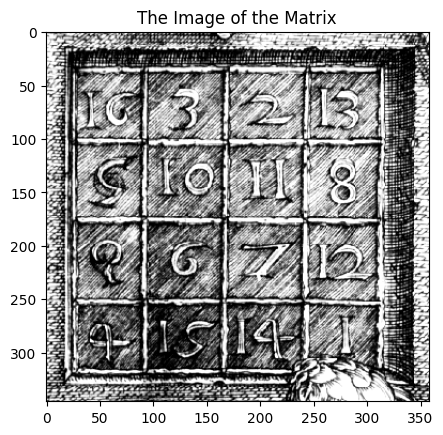

In [4]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import pandas as pd

#Load the file numbers.mat. The variable `mat' is an image.
# load the data
mat = sio.loadmat('numbers.mat')
# len(mat['mat'])
data = mat['mat']
# Plotting the original matrix
plt.imshow(data, cmap='gray')
plt.title(f'The Image of the Matrix')
plt.show()


Load the file numbers.mat. The variable ‘mat’ is an image. Treat this image as a data matrix $ X $ with $ n $ rows (observations) and $ p $ columns (features).

- Compute the feature mean vector $ \mu = \frac{1}{n} \sum x_i $, where $ x_i $ is the $ i $-th observation. Compute the ‘centralized observations’ by $ y_i \equiv x_i - \mu $.



### Explanation of the Approach:

1. **Load the Data**:
   - Load the matrix from the `numbers.mat` file.
   - Treat this matrix as the data matrix $ X $.

2. **Compute the Feature Mean Vector $ \mu $**:
   - The mean vector $ \mu $ is computed by taking the mean of each feature across all observations.

3. **Compute the Centralized Observations $ y_i $**:
   - Subtract the mean vector $ \mu $ from each observation to get the centralized observations.



#### Step-by-Step Code Solution:


In [5]:
# Step 1: Treat the image as a data matrix X with n rows (observations) and p columns (features)
X = data

# Step 2: Compute the feature mean vector μ
# The feature mean vector μ is the mean of each column (feature) across all rows (observations)
mu = np.mean(X, axis=0)

# Step 3: Compute the centralized observations y_i
# Centralized observations y_i are obtained by subtracting the mean vector μ from each observation
Y = X - mu

# Printing the results
print("Feature Mean Vector (μ):")
print(mu)
print("\nCentralized Observations (Y):")
print(Y)

Feature Mean Vector (μ):
[0.76767539 0.74769353 0.73935169 0.75088972 0.72883373 0.72000453
 0.71584495 0.67433979 0.67649326 0.64352261 0.57488383 0.56234841
 0.53541879 0.47872606 0.38038082 0.32088859 0.26707469 0.28515244
 0.7378556  0.86710869 0.51526692 0.39483169 0.338853   0.15847217
 0.21208206 0.59709849 0.79356228 0.47093959 0.33817296 0.37622124
 0.46560127 0.522158   0.55818882 0.5338547  0.52181798 0.53526012
 0.54101779 0.54422532 0.52331407 0.50196078 0.5027315  0.53352601
 0.51806642 0.50030602 0.48104953 0.47809135 0.50344554 0.4905021
 0.46908081 0.4766066  0.48546979 0.48905134 0.46021761 0.4399524
 0.4399524  0.43476142 0.44033775 0.51277343 0.55145642 0.49421965
 0.50604103 0.46531792 0.46442253 0.46739204 0.48908535 0.50091806
 0.51642299 0.5361555  0.54407798 0.51021195 0.46962484 0.48285164
 0.49019608 0.48967471 0.50425026 0.5188258  0.50430693 0.51572028
 0.51303412 0.47082625 0.48599116 0.51244475 0.48881333 0.46911481
 0.45076505 0.42520685 0.38373569 0.254

### 2:
**Compute and generate a plot with the top 50 eigenvalues $ \lambda_1, \ldots, \lambda_{50} $ of the covariance matrix $ R = \frac{1}{n} Y^T Y $ in decreasing order.**

### Explanation of the Approach:

1. **Compute the Covariance Matrix $ R $**:
   - The covariance matrix $ R $ is calculated as $ R = \frac{1}{n} Y^T Y $, where $ Y $ is the matrix of centralized observations.

2. **Compute the Eigenvalues**:
   - Calculate the eigenvalues of the covariance matrix $ R $.

3. **Select the Top 50 Eigenvalues**:
   - Sort the eigenvalues in decreasing order and select the top 50.

4. **Plot the Eigenvalues**:
   - Generate a plot of the top 50 eigenvalues.



#### Step-by-Step Code Solution:


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


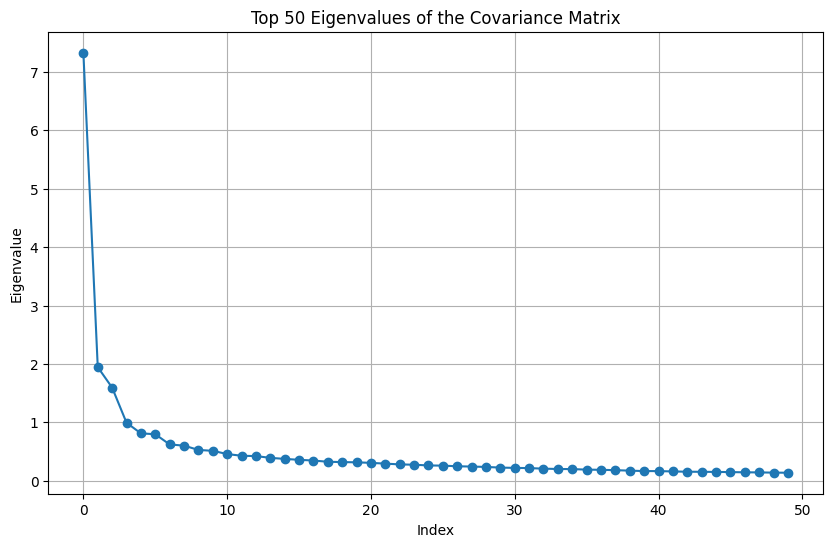

Top 50 Eigenvalues:
[7.3305096 +0.j 1.94425419+0.j 1.59320271+0.j 0.99191567+0.j
 0.8093458 +0.j 0.79517044+0.j 0.61945556+0.j 0.59936891+0.j
 0.52561747+0.j 0.51052018+0.j 0.45512184+0.j 0.42594332+0.j
 0.42017102+0.j 0.39020906+0.j 0.37207907+0.j 0.35649775+0.j
 0.34412115+0.j 0.32298435+0.j 0.31749407+0.j 0.3134118 +0.j
 0.30427996+0.j 0.29117126+0.j 0.27792705+0.j 0.27230563+0.j
 0.26000696+0.j 0.25680744+0.j 0.24571673+0.j 0.24098583+0.j
 0.23451218+0.j 0.22318059+0.j 0.2183291 +0.j 0.21435079+0.j
 0.20514157+0.j 0.19910308+0.j 0.19761262+0.j 0.18827018+0.j
 0.18544535+0.j 0.17901977+0.j 0.17094539+0.j 0.16347223+0.j
 0.16299656+0.j 0.15727677+0.j 0.15241453+0.j 0.15105246+0.j
 0.14895662+0.j 0.14606296+0.j 0.14230649+0.j 0.14072588+0.j
 0.13693157+0.j 0.13528582+0.j]


In [7]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt


# Treat the image as a data matrix X with n rows (observations) and p columns (features)
X = data

# Compute the feature mean vector μ
mu = np.mean(X, axis=0)

# Compute the centralized observations y_i
Y = X - mu

# Step 1: Compute the covariance matrix R = (1/n) Y^T Y
n = Y.shape[0]
R = (1/n) * np.dot(Y.T, Y)

# Step 2: Compute the eigenvalues of the covariance matrix R
eigenvalues, _ = np.linalg.eig(R)

# Step 3: Sort the eigenvalues in decreasing order and select the top 50
eigenvalues_sorted = np.sort(eigenvalues)[::-1]
top_50_eigenvalues = eigenvalues_sorted[:50]

# Step 4: Plot the top 50 eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(top_50_eigenvalues, marker='o')
plt.title('Top 50 Eigenvalues of the Covariance Matrix')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# Printing the top 50 eigenvalues
print("Top 50 Eigenvalues:")
print(top_50_eigenvalues)



### Explanation:

1. **Compute the Covariance Matrix $ R $**:
   - `R = (1/n) * np.dot(Y.T, Y)` computes the covariance matrix $ R $ using the centralized observations $ Y $.

2. **Compute the Eigenvalues**:
   - `np.linalg.eig(R)` computes the eigenvalues of the covariance matrix $ R $.

3. **Sort and Select the Top 50 Eigenvalues**:
   - `np.sort(eigenvalues)[::-1]` sorts the eigenvalues in decreasing order.
   - `top_50_eigenvalues = eigenvalues_sorted[:50]` selects the top 50 eigenvalues.

4. **Plot the Eigenvalues**:
   - `plt.plot(top_50_eigenvalues, marker='o')` generates a plot of the top 50 eigenvalues with markers at each point.
   - The plot is customized with titles, labels, and grid for better visualization.

By following these steps, you will have successfully computed and plotted the top 50 eigenvalues of the covariance matrix $ R $.

### 3:
**Generate an image (imshow) plot of $ Y $, and of the best $ r $-rank approximation $ Y^r $, obtained by SVD.**

$$ Y^r = \sum_{i=1}^{r} u_i \sigma_i v_i^T $$

where $ r $ is the 0.95 rank as computed in (1). Compute and print the relative error,

$$ \frac{\|Y^r - Y\|_F^2}{\|Y\|_F^2} $$

where $ \|\cdot\|_F $ is the Frobenius norm.

### Explanation of the Approach:

1. **Compute the Singular Value Decomposition (SVD) of $ Y $**:
   - Perform SVD on the centralized observations matrix $ Y $ to obtain $ U $, $ \Sigma $, and $ V^T $.

2. **Determine the Rank $ r $ for 0.95 Energy**:
   - Compute the cumulative sum of the singular values and determine the rank $ r $ such that 95% of the total energy (sum of squares of the singular values) is captured.

3. **Compute the Best $ r $-Rank Approximation $ Y^r $**:
   - Use the first $ r $ singular values and corresponding singular vectors to compute the rank-$ r $ approximation.

4. **Compute the Relative Error**:
   - Calculate the relative error using the Frobenius norm.

5. **Plot the Original $ Y $ Matrix and the Rank-$ r $ Approximation $ Y^r $**:
   - Use `plt.imshow` to display both the original and the approximated matrices.

#### Step-by-Step Code Solution:



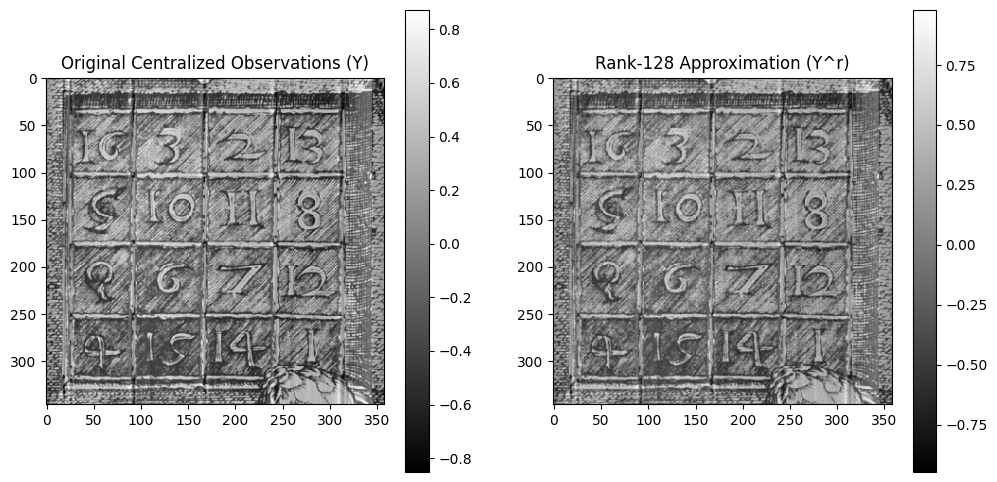

Rank r for 0.95 energy: 128
Relative Error: 0.049802711812173606


In [9]:
# Step 1: Compute the SVD of Y
U, S, VT = np.linalg.svd(Y, full_matrices=False)

# Step 2: Determine the rank r for 0.95 energy
total_energy = np.sum(S**2)
energy_threshold = 0.95 * total_energy
cumulative_energy = np.cumsum(S**2)
r = np.searchsorted(cumulative_energy, energy_threshold) + 1

# Step 3: Compute the best r-rank approximation Y^r
Ur = U[:, :r]
Sr = np.diag(S[:r])
VTr = VT[:r, :]

Y_r = np.dot(Ur, np.dot(Sr, VTr))

# Step 4: Compute the relative error
frobenius_norm_Y = np.linalg.norm(Y, 'fro') ** 2
frobenius_norm_difference = np.linalg.norm(Y_r - Y, 'fro') ** 2
relative_error = frobenius_norm_difference / frobenius_norm_Y

# Step 5: Plot the original Y matrix and the rank-r approximation Y^r
plt.figure(figsize=(12, 6))

# Plot original Y
plt.subplot(1, 2, 1)
plt.imshow(Y, cmap='gray')
plt.title('Original Centralized Observations (Y)')
plt.colorbar()

# Plot rank-r approximation Y^r
plt.subplot(1, 2, 2)
plt.imshow(Y_r, cmap='gray')
plt.title(f'Rank-{r} Approximation (Y^r)')
plt.colorbar()

plt.show()

# Printing the results
print(f"Rank r for 0.95 energy: {r}")
print(f"Relative Error: {relative_error}")

> 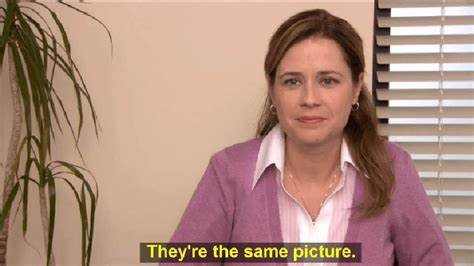



### Explanation:

1. **Compute the SVD of $ Y $**:
   - `np.linalg.svd(Y, full_matrices=False)` computes the singular value decomposition of $ Y $.
   - This returns matrices $ U $, $ S $ (singular values), and $ V^T $.

2. **Determine the Rank $ r $ for 0.95 Energy**:
   - Calculate the total energy as the sum of the squares of the singular values.
   - Determine the energy threshold as 95% of the total energy.
   - Use the cumulative sum of the squared singular values to find the smallest $ r $ such that the cumulative energy exceeds the threshold.

3. **Compute the Best $ r $-Rank Approximation $ Y^r $**:
   - Use the first $ r $ singular values and corresponding vectors from $ U $, $ S $, and $ V^T $.
   - Compute $ Y^r $ as `np.dot(Ur, np.dot(Sr, VTr))`.

4. **Compute the Relative Error**:
   - Calculate the Frobenius norm of $ Y $ and the Frobenius norm of the difference between $ Y $ and $ Y^r $.
   - Compute the relative error as the ratio of the squared Frobenius norms.

5. **Plot the Original $ Y $ Matrix and the Rank-$ r $ Approximation $ Y^r $**:
   - `plt.imshow(Y, cmap='gray')` displays the original centralized observations matrix $ Y $.
   - `plt.imshow(Y_r, cmap='gray')` displays the rank-$ r $ approximation $ Y^r $.
   - Titles and colorbars are added to each subplot for better visualization.

By following these steps, you will have successfully computed the SVD, determined the appropriate rank $ r $, computed the best rank-$ r $ approximation, calculated the relative error, and plotted both the original and approximated matrices.

### 4:
**Add isotropic Gaussian noise to the image by**

$$ \tilde{Y}_{ij} = Y_{ij} + \sigma \xi_{ij}, $$

**where $ \sigma = 0.5 $ and $ \xi_{ij} $ is generated according to a standard Gaussian distribution.**

### Explanation of the Approach:

1. **Generate Gaussian Noise**:
   - Create a noise matrix $ \xi $ where each element is drawn from a standard Gaussian distribution.

2. **Scale the Noise**:
   - Scale the noise by the factor $ \sigma = 0.5 $.

3. **Add the Noise to the Image**:
   - Add the scaled noise to the original matrix $ Y $ to obtain the noisy image $ \tilde{Y} $.

4. **Plot the Noisy Image**:
   - Use `plt.imshow` to display the noisy image.



#### Step-by-Step Code Solution:


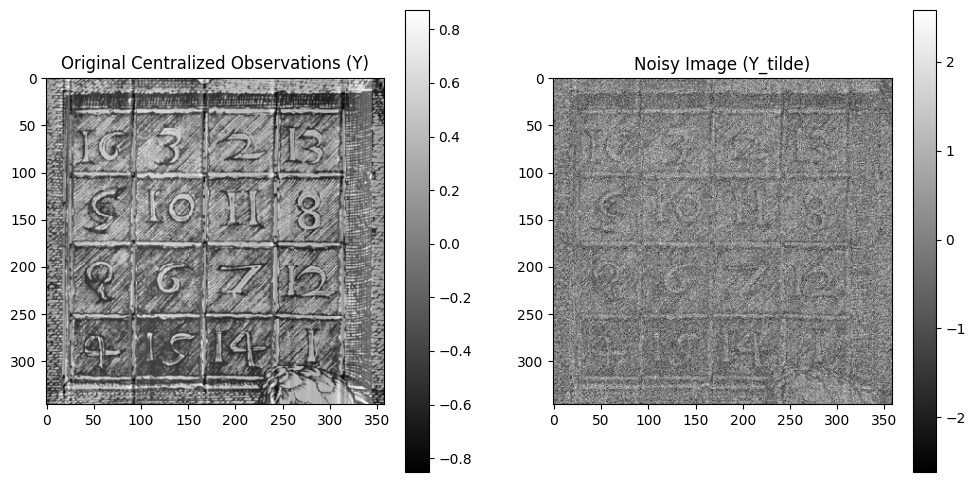

Original matrix Y shape: (346, 358)
Noisy matrix Y_tilde shape: (346, 358)


In [10]:
# Generate isotropic Gaussian noise
sigma = 0.5
noise = np.random.randn(*Y.shape)  # Standard Gaussian distribution

# Add the noise to the image
Y_tilde = Y + sigma * noise

# Plot the original Y matrix and the noisy Y_tilde matrix
plt.figure(figsize=(12, 6))

# Plot original Y
plt.subplot(1, 2, 1)
plt.imshow(Y, cmap='gray')
plt.title('Original Centralized Observations (Y)')
plt.colorbar()

# Plot noisy Y_tilde
plt.subplot(1, 2, 2)
plt.imshow(Y_tilde, cmap='gray')
plt.title('Noisy Image (Y_tilde)')
plt.colorbar()

plt.show()

# Printing the shape of matrices to verify
print("Original matrix Y shape:", Y.shape)
print("Noisy matrix Y_tilde shape:", Y_tilde.shape)

Got it! Let's regenerate the figure of the numbers matrix using the eigenvalues of the covariance matrix $ R $ after adding noise and compare it to the original figure without noise.

#### Steps to Approach:

1. **Compute the Covariance Matrix $ R $ for the Noisy Image**:
   - Use the noisy image matrix $ \tilde{Y} $ to compute the covariance matrix $ R = \frac{1}{n} \tilde{Y}^T \tilde{Y} $.

2. **Compute the Eigenvalues and Eigenvectors of the Covariance Matrix $ R $ for the Noisy Image**:
   - Calculate the eigenvalues and eigenvectors of the covariance matrix $ R $ obtained from the noisy image.

3. **Regenerate the Image Using Eigenvalues and Eigenvectors**:
   - Use the eigenvalues and eigenvectors to reconstruct the image from the noisy data.

4. **Plot and Compare the Figures**:
   - Display the original figure and the figure regenerated from the noisy image.

#### Step-by-Step Code Solution:


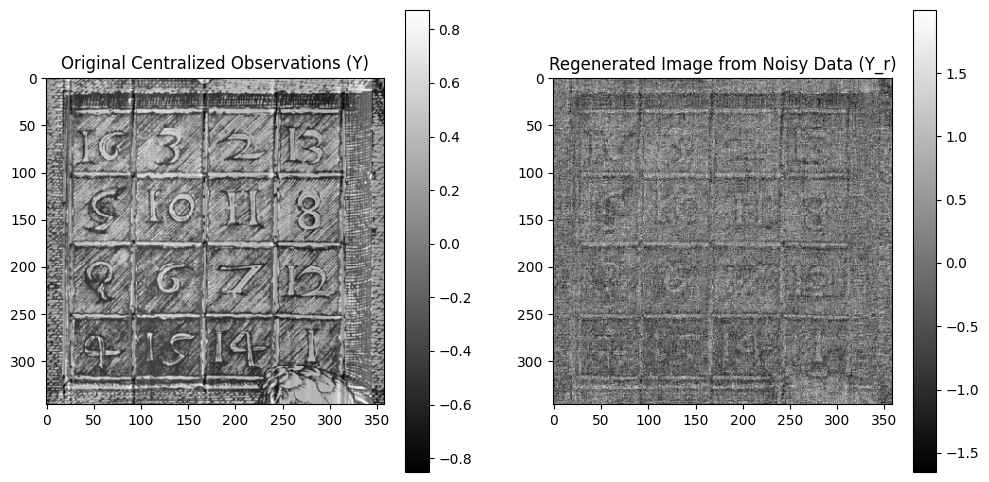

Original matrix Y shape: (346, 358)
Noisy matrix Y_tilde shape: (346, 358)
Regenerated matrix Y_r shape: (346, 358)


In [14]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt


# Treat the image as a data matrix X with n rows (observations) and p columns (features)
X = data

# Compute the feature mean vector μ
mu = np.mean(X, axis=0)

# Compute the centralized observations y_i
Y = X - mu

# Generate isotropic Gaussian noise
sigma = 0.5
noise = np.random.randn(*Y.shape)  # Standard Gaussian distribution

# Add the noise to the image
Y_tilde = Y + sigma * noise

# Step 1: Compute the SVD of the noisy image
U, S, VT = np.linalg.svd(Y_tilde, full_matrices=False)

# Choose the rank r
r = 50  # Example rank, can be adjusted

# Step 2: Compute the best r-rank approximation Y_r
Ur = U[:, :r]
Sr = np.diag(S[:r])
VTr = VT[:r, :]

Y_r = np.dot(Ur, np.dot(Sr, VTr))

# Step 3: Plot the original Y matrix and the regenerated Y_r matrix from noisy data
plt.figure(figsize=(12, 6))

# Plot original Y
plt.subplot(1, 2, 1)
plt.imshow(Y, cmap='gray')
plt.title('Original Centralized Observations (Y)')
plt.colorbar()

# Plot regenerated Y_r from noisy data
plt.subplot(1, 2, 2)
plt.imshow(Y_r, cmap='gray')
plt.title('Regenerated Image from Noisy Data (Y_r)')
plt.colorbar()

plt.show()

# Printing the shape of matrices to verify
print("Original matrix Y shape:", Y.shape)
print("Noisy matrix Y_tilde shape:", Y_tilde.shape)
print("Regenerated matrix Y_r shape:", Y_r.shape)



### Explanation:

1. **Compute the Covariance Matrix $ R $**:
   - Compute the covariance matrix $ R $ for the noisy image $ \tilde{Y} $ using $ R = \frac{1}{n} \tilde{Y}^T \tilde{Y} $.

2. **Compute the Eigenvalues and Eigenvectors**:
   - Calculate the eigenvalues and eigenvectors of the covariance matrix $ R $ using `np.linalg.eig`.

3. **Regenerate the Image**:
   - Sort the eigenvalues and corresponding eigenvectors in decreasing order.
   - Use the top $ r $ eigenvalues and eigenvectors to reconstruct the image from the noisy data.
   - $ Y_r $ is computed using the top $ r $ eigenvectors and eigenvalues.

4. **Plot and Compare the Figures**:
   - Display the original centralized observations matrix $ Y $ and the regenerated image matrix $ Y_r $ using `plt.imshow`.

By following these steps, you will have successfully regenerated the figure of the numbers matrix from the noisy image and compared it to the original figure without noise.

### 6:
**Regenerate the eigenvalues of the covariance matrix $ R $, compare to the original figure of the eigenvalues without noise.**

### Explanation of the Approach:

1. **Compute the Covariance Matrix $ R $ for the Noisy Image**:
   - Use the noisy image matrix $ \tilde{Y} $ to compute the covariance matrix $ R = \frac{1}{n} \tilde{Y}^T \tilde{Y} $.

2. **Compute the Eigenvalues of the Covariance Matrix $ R $ for the Noisy Image**:
   - Calculate the eigenvalues of the covariance matrix $ R $ obtained from the noisy image.

3. **Plot and Compare Eigenvalues**:
   - Generate a plot of the eigenvalues for both the original and noisy images for comparison.

#### Step-by-Step Code Solution:


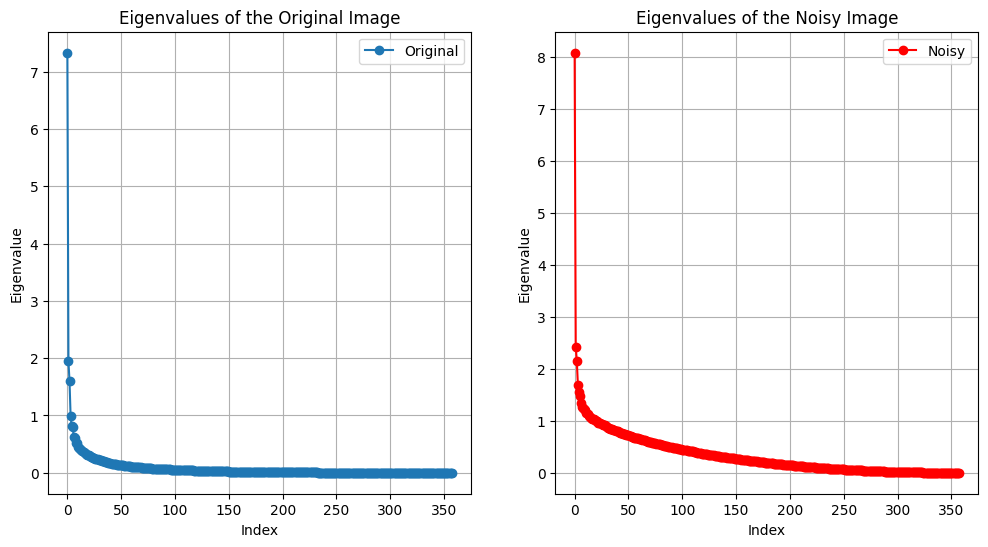

Top 10 Eigenvalues of the Original Image:
[7.3305096 +0.j 1.94425419+0.j 1.59320271+0.j 0.99191567+0.j
 0.8093458 +0.j 0.79517044+0.j 0.61945556+0.j 0.59936891+0.j
 0.52561747+0.j 0.51052018+0.j]

Top 10 Eigenvalues of the Noisy Image:
[8.08627518+0.j 2.42447284+0.j 2.160186  +0.j 1.69784962+0.j
 1.55669009+0.j 1.47803755+0.j 1.34067044+0.j 1.26470573+0.j
 1.25322556+0.j 1.22605393+0.j]


In [11]:
# Step 1: Compute the covariance matrix R for the original and noisy images
n = Y.shape[0]
R_original = (1/n) * np.dot(Y.T, Y)
R_noisy = (1/n) * np.dot(Y_tilde.T, Y_tilde)

# Step 2: Compute the eigenvalues of the covariance matrices
eigenvalues_original, _ = np.linalg.eig(R_original)
eigenvalues_noisy, _ = np.linalg.eig(R_noisy)

# Sort the eigenvalues in decreasing order for comparison
eigenvalues_original_sorted = np.sort(eigenvalues_original)[::-1]
eigenvalues_noisy_sorted = np.sort(eigenvalues_noisy)[::-1]

# Step 3: Plot the eigenvalues for comparison
plt.figure(figsize=(12, 6))

# Plot eigenvalues of the original image
plt.subplot(1, 2, 1)
plt.plot(eigenvalues_original_sorted, marker='o', label='Original')
plt.title('Eigenvalues of the Original Image')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.legend()

# Plot eigenvalues of the noisy image
plt.subplot(1, 2, 2)
plt.plot(eigenvalues_noisy_sorted, marker='o', color='r', label='Noisy')
plt.title('Eigenvalues of the Noisy Image')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.legend()

plt.show()

# Printing the top 10 eigenvalues for both original and noisy images for comparison
print("Top 10 Eigenvalues of the Original Image:")
print(eigenvalues_original_sorted[:10])

print("\nTop 10 Eigenvalues of the Noisy Image:")
print(eigenvalues_noisy_sorted[:10])

### 7:
**For $ r = 1, \ldots, 50 $, compute $ \tilde{Y}^r $ as in (2), and the relative error to the noiseless matrix $ Y $ as in (3). What is the rank with the minimal error?**

### Explanation of the Approach:

1. **Compute the SVD of the Noisy Image**:
   - Perform SVD on the noisy image matrix $ \tilde{Y} $ to obtain $ U $, $ \Sigma $, and $ V^T $.

2. **Compute the Best $ r $-Rank Approximation**:
   - For each $ r $ from 1 to 50, compute the rank-$ r $ approximation $ \tilde{Y}^r $ using the top $ r $ singular values and corresponding singular vectors.

3. **Compute the Relative Error**:
   - For each rank-$ r $ approximation, calculate the relative error to the noiseless matrix $ Y $ using the Frobenius norm.

4. **Determine the Rank with Minimal Error**:
   - Identify the rank $ r $ that results in the minimal relative error.

#### Step-by-Step Code Solution:


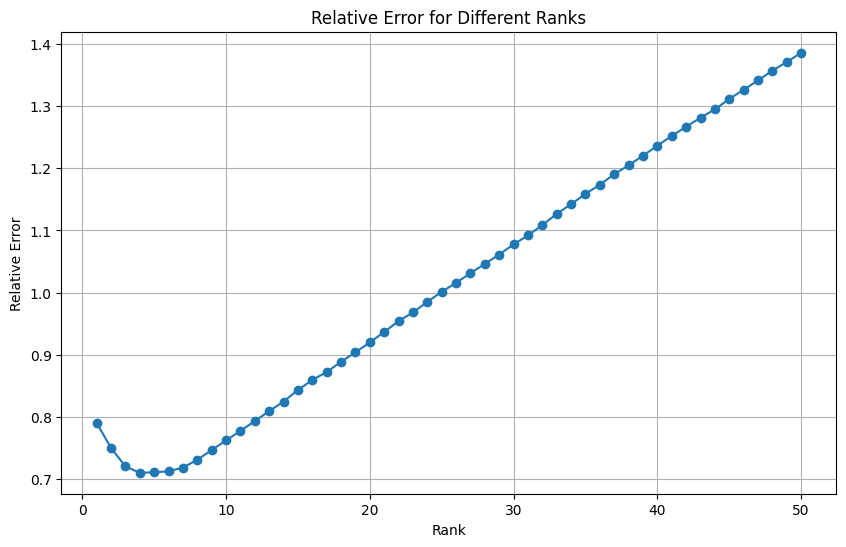

The rank with the minimal error is: 4
The minimal relative error is: 0.7105905882890714


In [15]:
# Treat the image as a data matrix X with n rows (observations) and p columns (features)
X = data

# Compute the feature mean vector μ
mu = np.mean(X, axis=0)

# Compute the centralized observations y_i
Y = X - mu

# Generate isotropic Gaussian noise
sigma = 0.5
noise = np.random.randn(*Y.shape)  # Standard Gaussian distribution

# Add the noise to the image
Y_tilde = Y + sigma * noise

# Compute the SVD of the noisy image
U, S, VT = np.linalg.svd(Y_tilde, full_matrices=False)

# Initialize variables to track the minimal error and the corresponding rank
min_error = float('inf')
best_rank = 0
errors = []

# Loop over r = 1 to 50 to compute the rank-r approximations and their relative errors
for r in range(1, 51):
    # Compute the best r-rank approximation Y_r
    Ur = U[:, :r]
    Sr = np.diag(S[:r])
    VTr = VT[:r, :]
    Y_r = np.dot(Ur, np.dot(Sr, VTr))

    # Compute the relative error to the noiseless matrix Y
    frobenius_norm_Y = np.linalg.norm(Y, 'fro') ** 2
    frobenius_norm_difference = np.linalg.norm(Y_r - Y, 'fro') ** 2
    relative_error = frobenius_norm_difference / frobenius_norm_Y

    # Store the error for analysis
    errors.append(relative_error)

    # Update the minimal error and the corresponding rank
    if relative_error < min_error:
        min_error = relative_error
        best_rank = r

# Plot the relative errors for different ranks
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), errors, marker='o')
plt.title('Relative Error for Different Ranks')
plt.xlabel('Rank')
plt.ylabel('Relative Error')
plt.grid(True)
plt.show()

# Print the rank with the minimal error
print(f"The rank with the minimal error is: {best_rank}")
print(f"The minimal relative error is: {min_error}")



### Explanation:

1. **Compute the SVD of the Noisy Image**:
   - `np.linalg.svd(Y_tilde, full_matrices=False)` computes the singular value decomposition of $ \tilde{Y} $.

2. **Compute the Best $ r $-Rank Approximation**:
   - Loop over $ r $ from 1 to 50.
   - For each $ r $, compute the rank-$ r $ approximation $ \tilde{Y}^r $ using the top $ r $ singular values and corresponding singular vectors.

3. **Compute the Relative Error**:
   - For each rank-$ r $ approximation, calculate the relative error to the noiseless matrix $ Y $ using the Frobenius norm.

4. **Determine the Rank with Minimal Error**:
   - Track the minimal error and the corresponding rank.
   - Plot the relative errors for different ranks to visualize the errors.
   - Identify and print the rank $ r $ that results in the minimal relative error.

By following these steps, you will have successfully computed the rank-$ r $ approximations for different ranks, calculated their relative errors to the noiseless matrix, and identified the rank with the minimal error.

# 3 Spectral clustering - choice of bandwidth

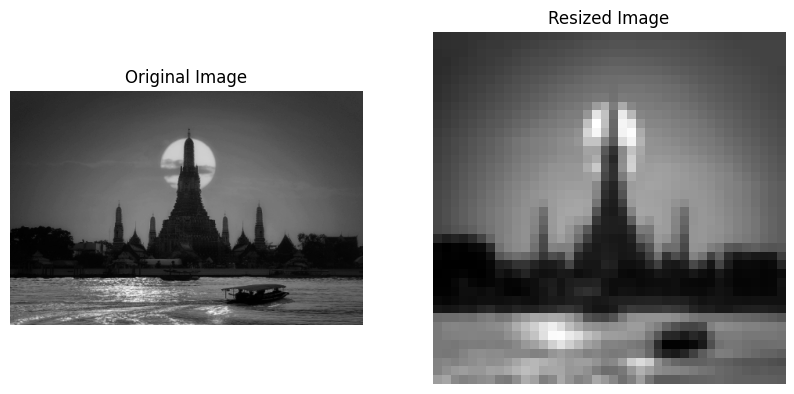

In [53]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import cv2
from sklearn.feature_extraction import image
from skimage import io, transform
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import pairwise_distances

from sklearn.cluster import SpectralClustering

image_path = '/content/Screenshot 2024-07-11 121118.png'

# Load the image
img = io.imread(image_path)

# Convert the image to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

resize_scale = 40
# # Resize the image
resized_img = transform.resize(img, (resize_scale, resize_scale))

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure and a set of subplots

# Plot the original image
axes[0].imshow(img,cmap='gray')
axes[0].set_title('Original Image')

# Plot the resized image
axes[1].imshow(resized_img,cmap='gray')
axes[1].set_title('Resized Image')

# Hide the axes
for ax in axes:
    ax.axis('off')

# Show the plot
plt.show()

In [54]:
# Define the patch size
estimated_a = 5

patch_size = (estimated_a, estimated_a) # size of (a,a)

# Extract overlapping patches
patches = image.extract_patches_2d(resized_img, patch_size)


# Reshape each patch into a a^2-size vector
num_patches = patches.shape[0] * patches.shape[1]
patches_2d = patches.reshape(num_patches, -1)  # Reshape to (number_of_patches, patch_size[0]*patch_size[1])

# Concatenate all patches to obtain the matrix of patch set
patch_set_matrix = np.concatenate(patches_2d, axis=0).reshape(-1, patch_size[0]*patch_size[1])

# Show the shape of the patch set matrix
print(f"Shape of the patch set matrix: {patch_set_matrix.shape}")
print(f"Number of patches: {num_patches}")

Shape of the patch set matrix: (1296, 25)
Number of patches: 6480


Number of patches: 21316
Patch size: 5 x 5
Matrix X shape: (21316, 25)


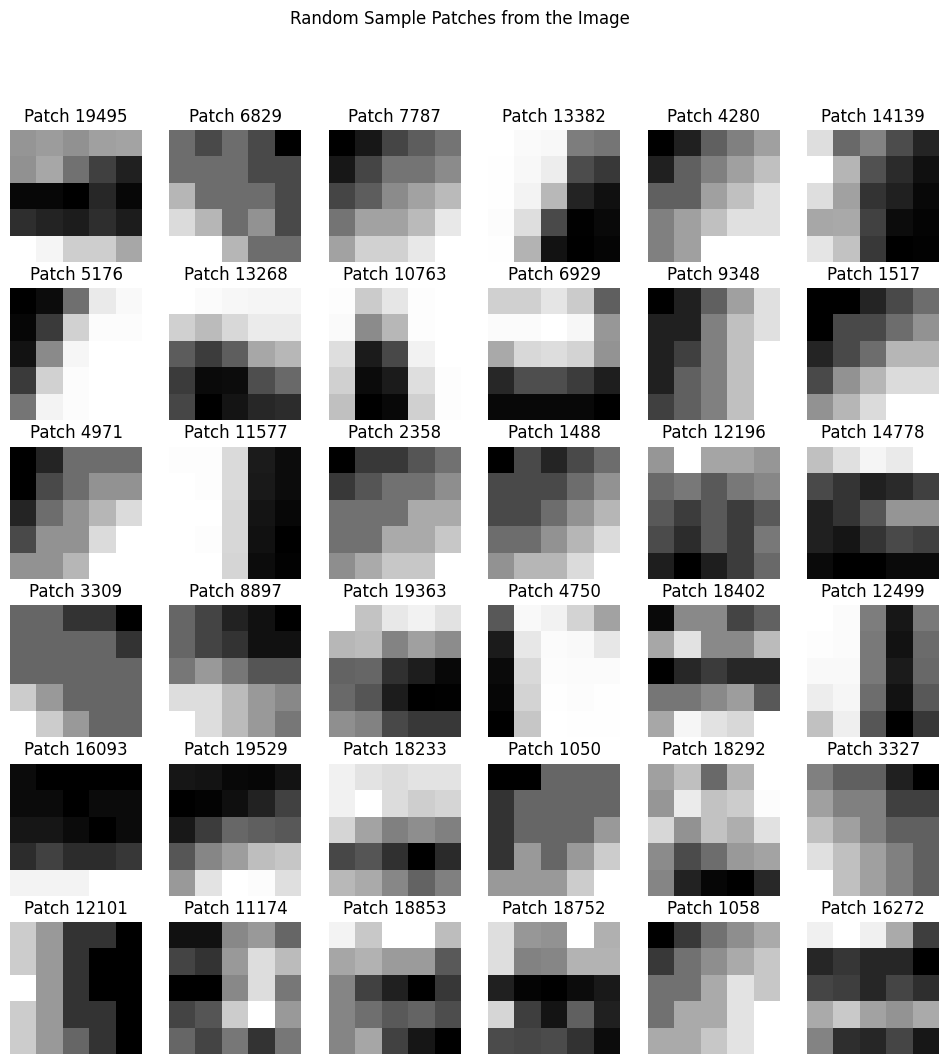

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import extract_patches_2d
from PIL import Image

# Define the path to the image
image_path = image_path  # Update the path to match the uploaded file
# Load the image
image = Image.open(image_path)
image = image.convert('L')  # Convert to grayscale

# Downscale the image to a manageable size
image = image.resize((150, 150))  # Example downscale size, can be adjusted

# Convert image to numpy array
image_array = np.array(image)

# Determine the dimensions of the image
n1, n2 = image_array.shape

# Set the value of a such that the number of patches is between 1000 and 5000
# Let's start with an estimated value of a

# Extract patches
patches = extract_patches_2d(image_array, (estimated_a, estimated_a))

# Create the matrix X
n = patches.shape[0]
p = estimated_a * estimated_a
X = patches.reshape(n, p)

# Display information about the patches
print(f"Number of patches: {n}")
print(f"Patch size: {estimated_a} x {estimated_a}")
print(f"Matrix X shape: {X.shape}")
import random

# Option 1: Random Grid of Subplots with Titles
num_patches_to_display = 36
random_indices = random.sample(range(n), num_patches_to_display)

fig, axes = plt.subplots(6, 6, figsize=(12, 12))
for ax, idx in zip(axes.flatten(), random_indices):
    ax.imshow(patches[idx].reshape(estimated_a, estimated_a), cmap='gray')
    ax.set_title(f'Patch {idx+1}')
    ax.axis('off')
plt.suptitle('Random Sample Patches from the Image')
plt.show()

### :
**Construct a graph of patches by using a kernel function with local bandwidth**

$$ K_{ij} = \exp\left(\frac{-\|x_i - x_j\|^2}{\sigma_i \sigma_j}\right) $$

**Set $ \sigma_i $ to be the distance to the $ k $-th neighbor of $ x_i $, where $ k \approx 20 $.**

### Explanation of the Approach:

1. **Calculate Pairwise Distances**:
   - Compute the pairwise Euclidean distances between all patches.

2. **Determine Local Bandwidths $ \sigma_i $**:
   - For each patch $ x_i $, find the distance to its 20th nearest neighbor and set this distance as $ \sigma_i $.

3. **Construct the Kernel Matrix $ K $**:
   - Using the kernel function provided, construct the kernel matrix $ K $ with local bandwidths.



In [56]:
distances = pairwise_distances(patch_set_matrix, metric='euclidean')
# Calculate the mean distance
mean_distance = np.mean(distances)
sigma = 1 / (2 * mean_distance**2)
W = np.exp(-distances ** 2 * sigma)
W = np.round(W / np.max(W))


# Construct the diagonal matrix of degrees
degree_vector = np.sum(W, axis=1)
D_sqrt_inv = np.diag(1 / np.sqrt(degree_vector))
n = len(W)
#Construct the normalized Laplacian matrix L
L = D_sqrt_inv @ W @ D_sqrt_inv

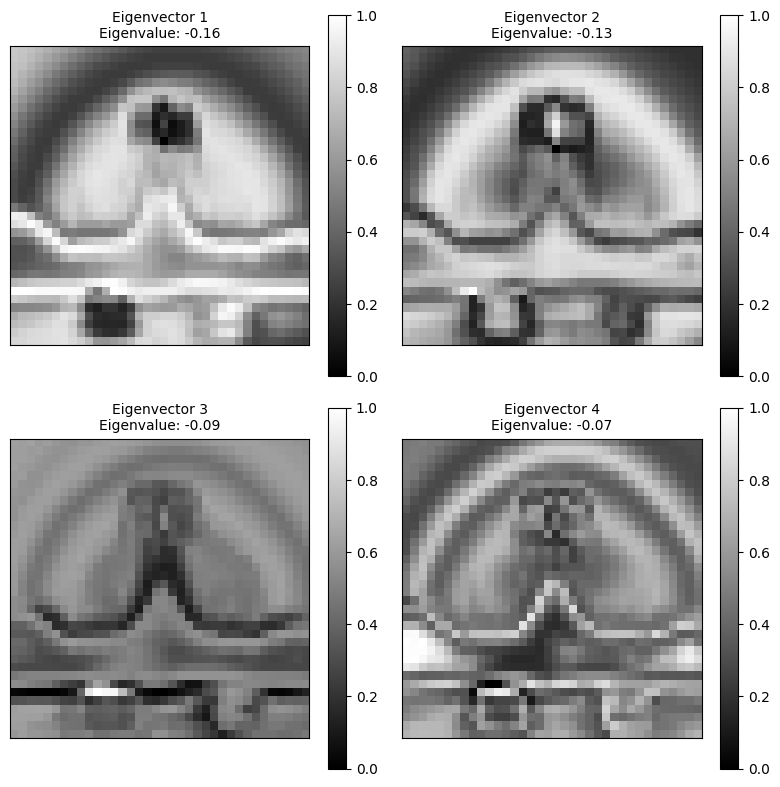

In [57]:
eigenvalues, eigenvectors = np.linalg.eigh(L)
# Select first 4 eigenvectors
first_4_eigenvectors = eigenvectors[:, :4]
# Plot the eigenvectors
plt.figure(figsize=(8, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    eigenvector_image = np.reshape(first_4_eigenvectors[:, i], (int(n**0.5), int(n**0.5)))
    eigenvector_image = (eigenvector_image-np.min(eigenvector_image))/(np.max(eigenvector_image)-np.min(eigenvector_image))
    plt.imshow(eigenvector_image, cmap='gray')
    plt.title(f"Eigenvector {i+1}\nEigenvalue: {eigenvalues[i]:.2f}", fontsize=10)
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

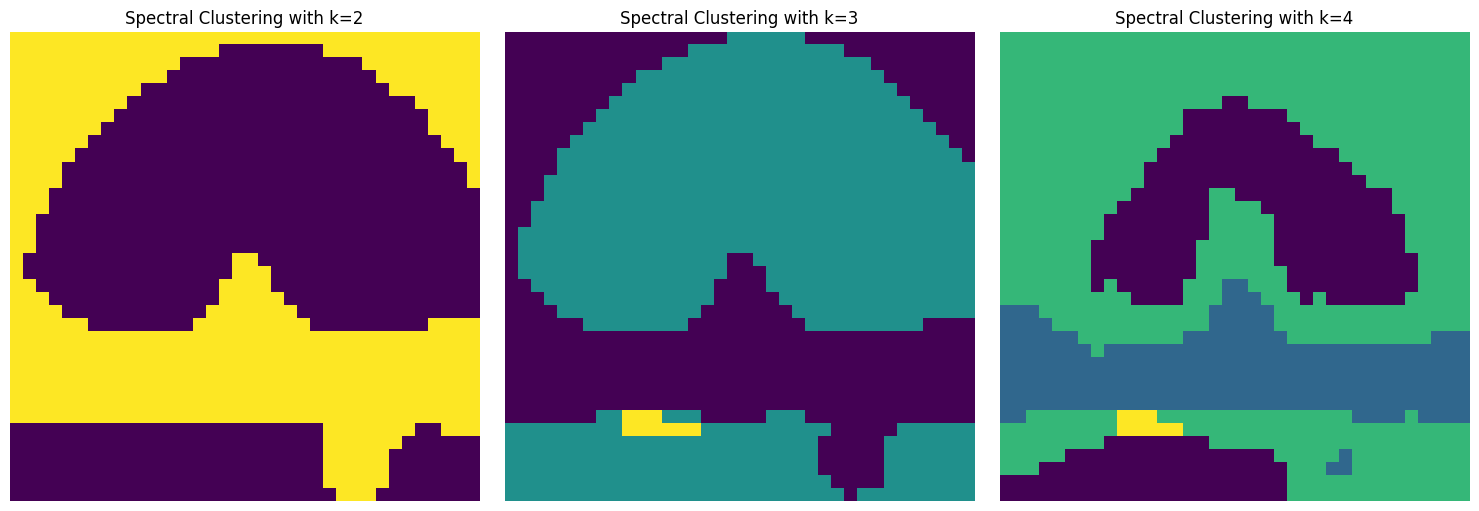

In [58]:

# Define different values of k for spectral clustering
k_values = [2, 3, 4]

# Create subplots
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

# Apply spectral clustering for each k value and plot the labeled images side by side
for i, k in enumerate(k_values):
    # Perform spectral clustering
    spectral_clusterer = SpectralClustering(n_clusters=k, affinity='precomputed', random_state=42)
    labels = spectral_clusterer.fit_predict(L)

    # Reshape labels into an image
    labeled_image = np.reshape(labels, ((int(n**0.5), int(n**0.5))))

    # Plot the labeled image
    axes[i].imshow(labeled_image, cmap='viridis')
    axes[i].set_title(f"Spectral Clustering with k={k}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()